In [45]:
import matplotlib.pyplot as plt
import pandas as pd 
import json
import numpy as np
import plotly.graph_objects as go
from binance.client import Client
from time import sleep
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score


In [46]:
with open('config.json') as jsonfile:
    file=json.load(jsonfile)
    jsonfile.close()
client=Client(file['api_key'], ['api_secret'])

x=pd.DataFrame(client.get_ticker())
coin_list=x[x.symbol.str.contains('USDT')]
coin_list.sort_values(by='priceChangePercent',ascending=False)


,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
1027,DOTDOWNUSDT,0.00001100,9.590,0.00012279,0.00011430,0.00012570,564835.00000000,0.00012530,1021548.28000000,0.00012580,...,0.00011470,0.00013000,0.00011350,32473878386.45000000,3987411.55155085,1634542757778,1634629157778,5325108,5343019,17912
1035,BELUSDT,0.21100000,8.748,2.50533351,2.41500000,2.62300000,460.70000000,2.62000000,513.50000000,2.62200000,...,2.41200000,2.67000000,2.33000000,6342045.00000000,15888937.86880000,1634542760288,1634629160288,15465173,15516757,51585
537,FTMUSDT,0.18660000,8.412,2.28232002,2.21830000,2.40490000,253.00000000,2.40500000,647.00000000,2.40540000,...,2.21830000,2.46590000,2.14490000,132556189.00000000,302535644.36250000,1634542760286,1634629160286,72994806,73396088,401283
900,BNBUPUSDT,37.38000000,7.970,485.85877945,469.11000000,506.39000000,0.04000000,506.25000000,0.04000000,507.37000000,...,469.01000000,523.44000000,453.55000000,7599.21000000,3692142.89540000,1634542759667,1634629159667,16226472,16244681,18210
770,STPTUSDT,0.01096000,7.938,0.14673827,0.13815000,0.14903000,3986.30000000,0.14903000,4543.50000000,0.14914000,...,0.13807000,0.15750000,0.13372000,182296245.90000000,26749836.38402000,1634542756497,1634629156497,11372051,11441913,69863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,TUSDUSDT,-0.00040000,-0.040,1.00016704,1.00040000,1.00000000,52.00000000,1.00000000,494995.00000000,1.00010000,...,1.00040000,1.00040000,1.00000000,8613977.00000000,8615415.86750000,1634542755247,1634629155247,16074368,16080926,6559
1444,ARUSDT,-0.02000000,-0.039,50.38885613,51.13000000,51.08000000,5.79000000,51.02000000,1.00000000,51.08000000,...,51.10000000,51.54000000,48.43000000,217724.02000000,10970864.31940000,1634542752175,1634629152175,12895682,12937978,42297
427,USDCUSDT,-0.00030000,-0.030,1.00013697,1.00050000,1.00010000,206.00000000,1.00000000,3776246.00000000,1.00010000,...,1.00040000,1.00050000,0.99980000,159977680.00000000,159999592.52390000,1634542759311,1634629159311,30529728,30561861,32134
1637,USDPUSDT,-0.00020000,-0.020,1.00032100,1.00060000,1.00020000,37050.71000000,1.00020000,158296.56000000,1.00030000,...,1.00040000,1.00090000,1.00020000,1051318.89000000,1051656.36111200,1634542631904,1634629031904,102544,103349,806


In [47]:

print('select the coin you want to trade')
sym=input()



select the coin you want to trade


In [48]:

frame=pd.DataFrame(client.get_klines(symbol=sym,interval='1d'))
frame = frame.iloc[:,:6]  
frame.columns = ['Time','Open','High','Low','Close','Volume']
frame=frame.set_index('Time')
frame.index=pd.to_datetime(frame.index,unit='ms')
frame=frame.astype('float')


                  macd      signal
Time                              
2020-08-10    0.000000    0.000000
2020-08-11  -12.999312   -2.599862
2020-08-12  -43.165652  -10.713020
2020-08-13  -94.344539  -27.439324
2020-08-14 -156.721227  -53.295705
...                ...         ...
2021-10-15  611.452439   54.360381
2021-10-16  654.442418  174.376789
2021-10-17  660.454386  271.592308
2021-10-18  591.221511  335.518149
2021-10-19  546.717625  377.758044

[436 rows x 2 columns]


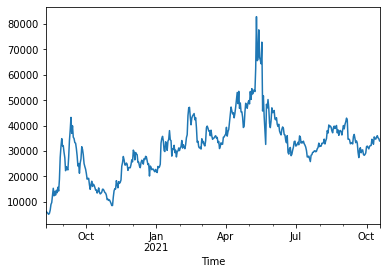

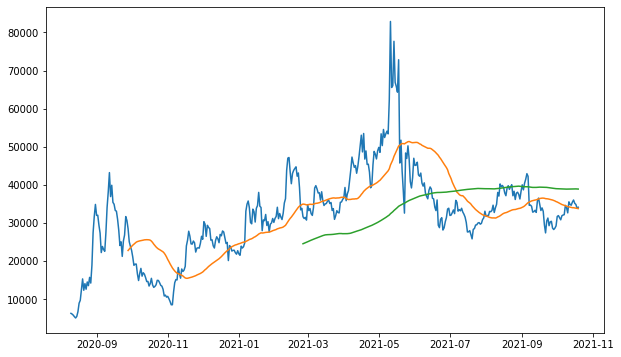

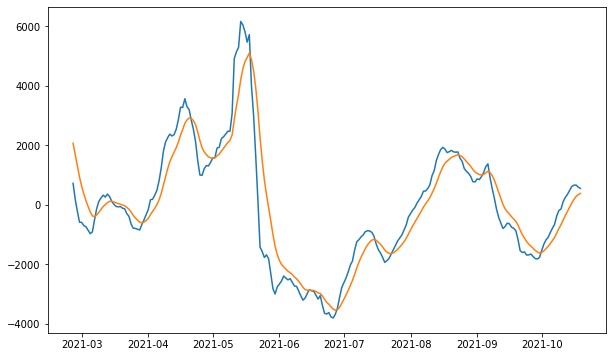

In [49]:
def macd(lengthrapide,lengthslow,signal):
    frame['emarapide']=frame.Close.ewm(span=lengthrapide,adjust=False).mean()
    frame['emaslow']=frame.Close.ewm(span=lengthslow,adjust=False).mean()
    frame['macd']=frame.emarapide.subtract(frame.emaslow)
    frame['signal']=frame.macd.ewm(span=9,adjust=False).mean()
    print(frame[['macd','signal']])
macd(13,26,9)
frame.Close.plot()
frame=frame.copy()
sma50=50
sma200=200
frame['sma50']=frame.Close.rolling(sma50).mean()
frame['sma200']=frame.Close.rolling(sma200).mean()
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(frame[['Close','sma50','sma200']])
frame=frame.dropna() #drop unavailable columns or rows
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(frame[['macd','signal']])

In [50]:
#nbformat>=4.2.0 is required
fig = go.Figure(data=[go.Candlestick(x=frame.index,
                    open=frame.Open,
                    high=frame.High,
                    low=frame.Low,
                    close=frame.Close)])
fig.show()

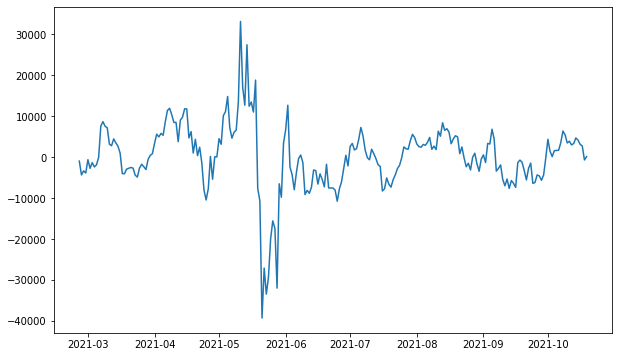

In [51]:
x=[frame.Close[i-10] for i in range(len(frame.Close))]
y=[frame.Close[i] for i in range(len(frame.Close))]
frame['momentum']=[y[t]-x[t] for t in range(len(x))]
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(frame[['momentum']])


In [52]:
frame

,Open,High,Low,Close,Volume,emarapide,emaslow,macd,signal,sma50,sma200,momentum
Time,,,,,,,,,,,,
2021-02-25,33752.60,35577.60,31336.59,31600.98,907.311325,38133.707130,37415.626652,718.080478,2067.125922,34927.8070,24513.84015,-1014.66
2021-02-26,31627.81,33254.79,29800.00,31141.43,983.955193,37134.810398,36950.871345,183.939053,1690.488548,34889.4766,24638.40135,-4377.36
2021-02-27,31117.23,33433.82,30685.08,31442.60,680.812755,36321.637484,36542.851245,-221.213761,1308.148086,34820.1568,24765.41335,-3396.84
2021-02-28,31445.92,31588.25,27437.73,30722.16,865.456218,35521.712129,36111.688931,-589.976802,928.523109,34719.8880,24890.27605,-3904.78
2021-03-01,30760.73,34855.88,30652.48,34782.12,842.746756,35416.056110,36013.202343,-597.146233,623.389240,34735.8758,25037.45170,-660.68
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-15,35413.06,36674.10,34634.81,35994.14,428.276260,33851.504597,33240.052159,611.452439,54.360381,33974.3902,38920.01000,4134.10
2021-10-16,35993.88,36363.52,34990.06,35135.00,297.306640,34034.861083,33380.418665,654.442418,174.376789,33920.7790,38918.30375,3086.83
2021-10-17,35139.19,35608.23,33088.06,34827.05,232.432720,34148.030929,33487.576542,660.454386,271.592308,33856.4298,38911.72645,2684.99


coefficient of determination r**2 is  0.4392664526684533


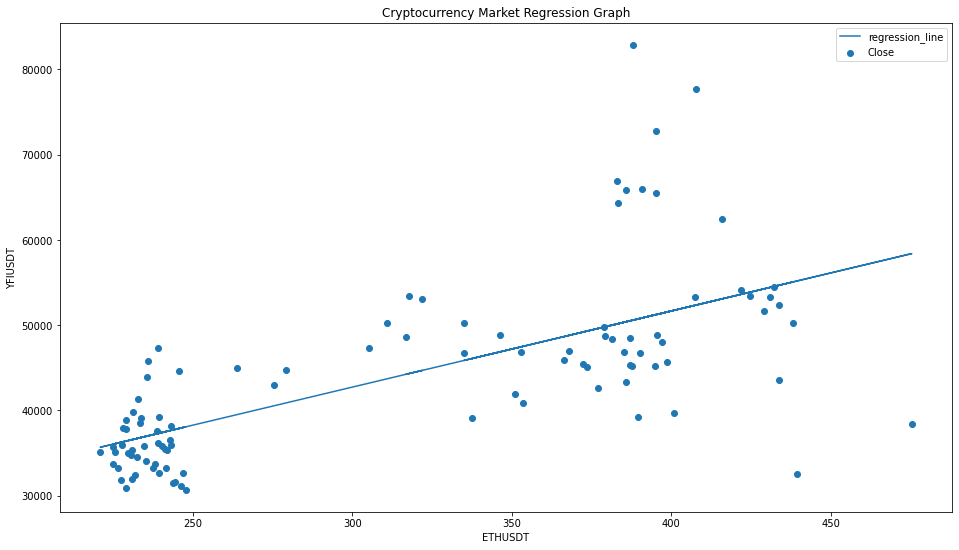

In [53]:
verify="would you want to compare selected asset with another asset"
symbol=input('Which symbol?')
second_kline=pd.DataFrame(client.get_klines(symbol=symbol,interval='1d'))
second_kline.columns=['Time','Open','High','Low','Close','Volume','emarapide','emaslow','macd','signal','sma50','sma200']
second_kline=second_kline.set_index('Time')
second_kline.index=pd.to_datetime(second_kline.index,unit='ms')
second_kline=second_kline.astype('float')
source=input('source: Open,Close,High,Low or Volume?')
if(source!='Open' and source!='Close' and source!='High' and source!='Low' and source!='Volume'):
    source='Close' #default value for source 
x=np.array(second_kline[source][:100]).reshape(-1,1)
y=np.array(frame[source][:100]).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
y_predict=model.predict(x)
print('coefficient of determination r**2 is ',r_sq)
plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x, y_predict)
plt.legend(['regression_line',source])
plt.title('Cryptocurrency Market Regression Graph')
plt.xlabel(symbol)
plt.ylabel(sym)
plt.show()


standard deviation of YFIUSDT 10593.85417313764
standard deviation of ETHUSDT 78.64974811771361
the covariance is cov(x,y) =  552224.0859679292
the product of standard deviations is  833203.9623130647
the corellation is r =  0.6627717953175533


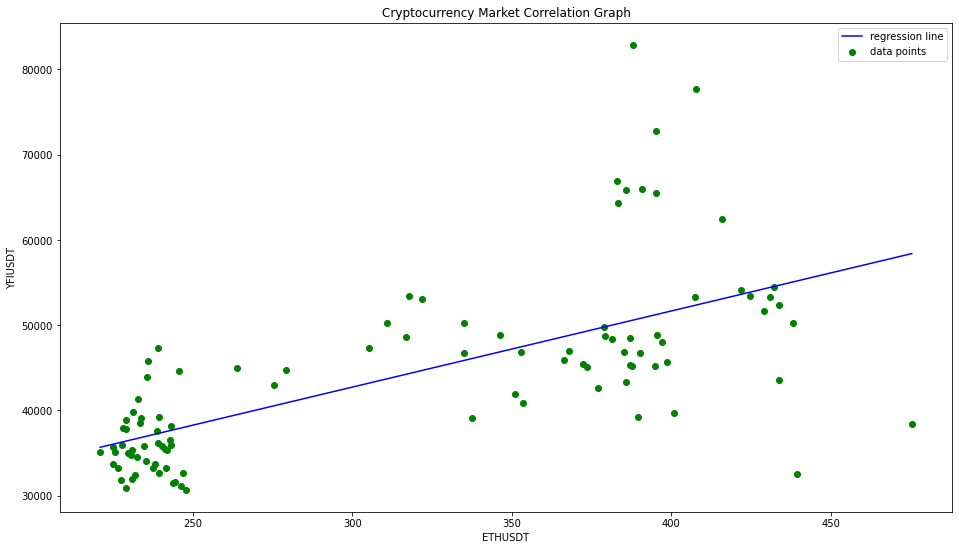

In [54]:
stdx=second_kline[source][:100].std()
stdy=frame[source][:100].std()


std_product=stdx*stdy
cov=np.cov(second_kline[source][:100],frame[source][:100])
correlation=np.corrcoef(second_kline[source][:100],frame[source][:100],rowvar=False)

print('standard deviation of '+sym,stdy)
print('standard deviation of '+symbol,stdx)
print('the covariance is cov(x,y) = ', cov[0][1])
print('the product of standard deviations is ',std_product)
print("the corellation is r = ",correlation[0][1])
plt.figure(figsize=(16,9))
plt.scatter(x,y,color='green')
plt.plot(np.unique(x),np.poly1d(np.polyfit(second_kline[source][:100],frame[source][:100],1))(np.unique(x)),color='blue')
plt.legend(['regression line','data points'])
plt.title('Cryptocurrency Market Correlation Graph')
plt.xlabel(symbol)
plt.ylabel(sym)
plt.show()

In [55]:
print('Did you just realised the last two graph is same because we draw regression graphic according to correlation:)')

Did you just realised the last two graph is same because we draw regression graphic according to correlation:)


In [56]:
while True:
    ticker=pd.DataFrame(client.get_ticker())
    x=ticker[ticker.symbol.str.contains(sym)]
    print('last price is',float(x.lastPrice.values))
    from time import sleep
    sleep(10)

last price is 34095.53
last price is 34095.53
last price is 34095.53
last price is 34095.53
last price is 34082.24
last price is 34082.24
last price is 34082.24
last price is 34111.48
last price is 34111.48
last price is 34111.48
last price is 34103.63
last price is 34103.63
last price is 34103.63
last price is 34103.63
last price is 34103.63
last price is 34103.63
last price is 34101.05
last price is 34107.33
last price is 34102.87
last price is 34102.87
last price is 34102.87
last price is 34100.0
last price is 34100.0
last price is 34100.0
last price is 34100.0
last price is 34065.8
last price is 34065.8
last price is 34065.8
last price is 34065.8
last price is 34065.8
last price is 34065.8
last price is 34065.8
last price is 34065.8
last price is 34065.8
last price is 34088.95
last price is 34088.95
last price is 34088.95
last price is 34088.95
last price is 34088.95
last price is 34088.95
last price is 34088.95
last price is 34088.95
last price is 34088.95
last price is 34088.95
l

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))